<a href="https://colab.research.google.com/github/Pattaraudom/Python-Clustering/blob/main/Coding_for_Clustering_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Instructions

# Preliminaries: Inspect and Set up environment


In [ ]:
import datetime
import pandas as pd
import numpy as np

In [ ]:
print(datetime.datetime.now())

2023-08-12 17:57:30.850466


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.10.12


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
# TODO: install packages

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst. Congratulations!

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their bank account).

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.)
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any preprocessing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

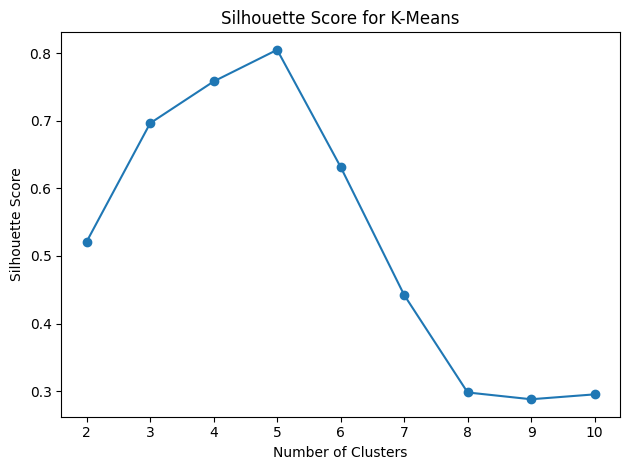

In [ ]:
# Data preporcessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score

# Standardize the data
scaler = StandardScaler()
df_s = scaler.fit_transform(df1)

# Determine the optimal number of clusters
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_s)
    silhouette_scores.append(silhouette_score(df_s, kmeans.labels_))

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
# Calculate Silhouette score
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(df1, k_means.labels_)

0.6782348405719982

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


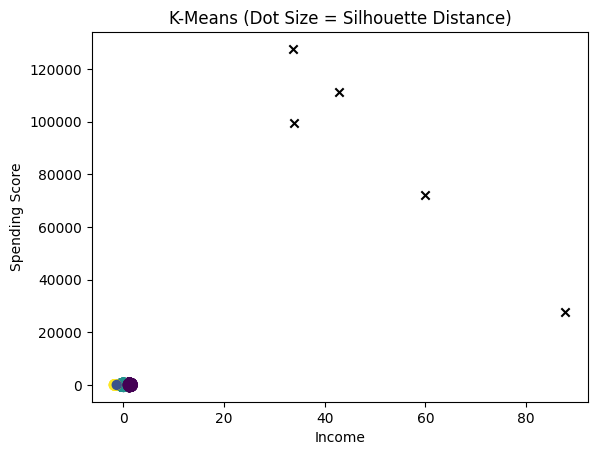

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sample_silhouette_values = silhouette_samples(df_s, k_means.labels_)
sizes = 100*sample_silhouette_values

plt.figure()
plt.scatter(df_s[:, 0], df_s[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)")
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()


In [ ]:


from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)

    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis']
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
d = stats.describe(X, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(labels)):
    d = stats.describe(X[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))




## 1.2: Clustering Algorithm #2

In [ ]:
# TODO: delete this comment and insert code here. Feel free to add more code cells as appropriate.

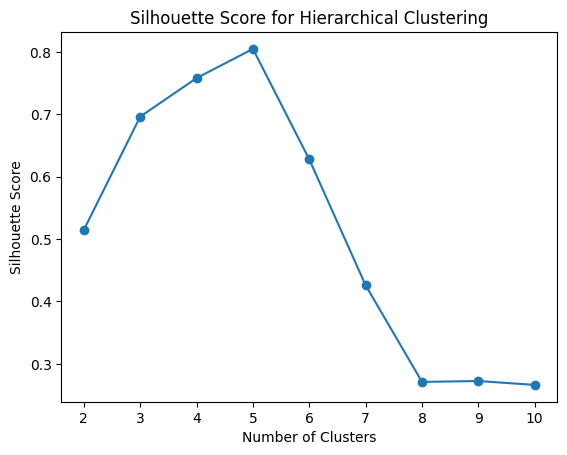

In [ ]:
# Data preporcessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

# Determine the optimal number of clusters using Silhouette Score
silhouette_scores = []

for k in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, agglomerative.labels_))

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.show()

In [ ]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
aggl = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
aggl.fit(df1)

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [ ]:
# Calculate Silhouette score
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(df1, aggl.labels_)

0.6908388206518116

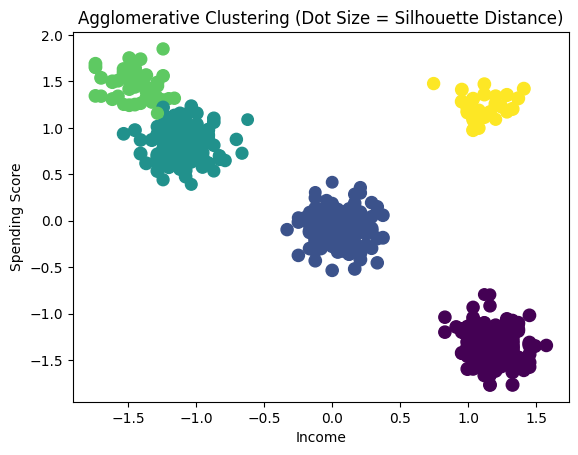

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples

# Calculate dot sizes based on silhouette values
sizes = 100 * sample_silhouette_values

# Scatter plot
plt.figure()
plt.scatter(df_s[:, 0], df_s[:, 1], s=sizes, c=aggl.labels_)

plt.title("Agglomerative Clustering (Dot Size = Silhouette Distance)")
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

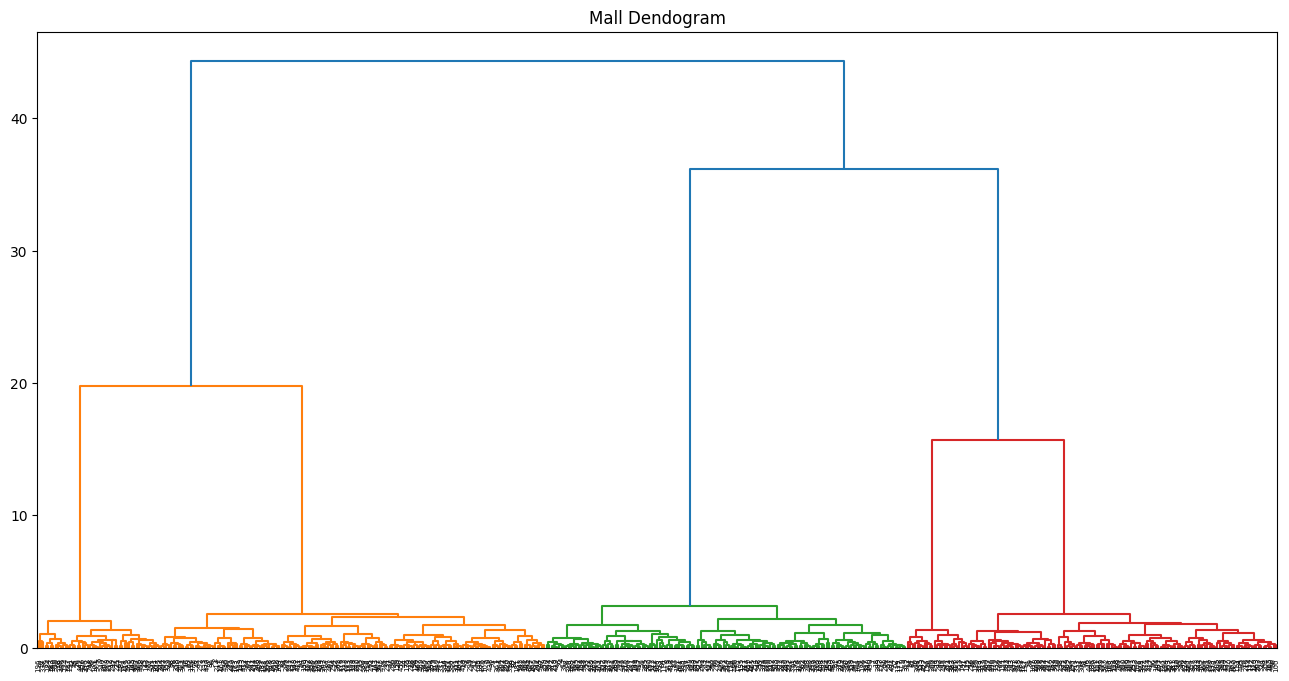

In [ ]:
import scipy.cluster
aggl = scipy.cluster.hierarchy.linkage(df_s, method='ward', metric='euclidean')

# Plot the dendogram 0 this time with better labels
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Mall Dendogram");
dend = scipy.cluster.hierarchy.dendrogram(aggl);

## 1.3 Model Comparison

After running 2 models, K-means Clustering give Silhouette score at 0.8048 while Agglomerative Clustering is at 0.6213.
*   The higher silhouette score by K-means indicates better quality of results to defined clusters of dataset.
*   In terms of ease of use, K-means is easier to use due to its simplicity, only need to specific number of clusters while Agglomerative Clustering, we also need to specific linkage and distance.
*   K-means use Euclidean as distance metric while Agglomerative Clustering can use any distance metric.
*   K-means is run faster than Agglomerative Clustering
*   K-means centroids are easy to interpret, as they are the mean of the points within the cluster. Agglomerative clustering produces a hierarchy of clusters that might be harder to interpret.

## 1.4 Personas

In [ ]:
from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
labels = kmeans.fit_predict(df_s)
df_b= scaler.inverse_transform(df_s)

# Use the original feature names as column names
col_names = df1.columns

def stats_to_df(d, scaler, col_names):
    tmp_df = pd.DataFrame(columns=col_names)

    tmp_df.loc[0] = d.minmax[0]
    tmp_df.loc[1] = d.mean
    tmp_df.loc[2] = d.minmax[1]
    tmp_df.loc[3] = d.variance
    tmp_df.loc[4] = d.skewness
    tmp_df.loc[5] = d.kurtosis
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis']
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(df1.shape[0]))
d = stats.describe(df1, axis=0)

display(stats_to_df(d, scaler, col_names))

for i, label in enumerate(set(labels)):
    d = stats.describe(df1[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler, col_names))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: ignored

TODO: Delete this text and insert your answer here.

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out.

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence.

{Pasta} -> {Pasta sauce}

There are high percentage of transactions that customers buy pasta with pasta sauce. Also, the customer who buy pasta, they are likely to buy Pasta sauce, since pasta sauce is the main ingrediant of any pasta menu.



## 2.2: A rule that might have reasonably high support but low confidence.

{Eggs} -> {Tissue}

There are high percentage of transactions that customers buy eggs with tissue. Eggs can be cooked for a variety of manu so customer always buy it with every other items. Tissue also nessessary for cleaning purpose, every hosehold need it. However, the customer who buy eggs don't necessarily or unlikely to buy tissue, since they probably don't use it together. Low association between eggs and tissue.





## 2.3: A rule that might have low support and low confidence.

{Frozen food} -> {Body lotion}

There are low percentage of transactions that customers buy Frozen food with Body lotion because both items are in different grocery categories. Low association beteen Frozen food and Body lotion. Also, the customer who buy Frozen food don't necessarily or unlikely to buy Body lotion, since they probably don't use it together.


## 2.4: A rule that might have low support and high confidence.

{Beer} -> {Snack}

There are low percentage of transactions that customers buy Beer with Snack because both items are in different grocery categories and for different target customer group. Beer for adults, Snack for children. Low association beteen Beer and Snack. However, the customer who buy Beer are likely to buy Snack as complementary items to enjoy alongside their beers.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal components).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, using your findings from the previous steps, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do?


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2022) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question.
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [ ]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
#Data Preprocessing
#Drop some features that are not informative for prediction
X_train = X_train.drop(['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate'], axis=1)
print(X_train.columns)

AttributeError: ignored

In [ ]:
#Data Preprocessing
#Convert categorical features into a numerical features by OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

encoder=ce.OneHotEncoder(cols=['Sex','City','Purpose','DateOfBirth'])
encoder.fit(X_train,y_train)

X_train=encoder.transform(X_train)

ValueError: ignored

In [ ]:
#Build Baseline model : Random Forests
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=0)

Model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
#Perform cross-validation and Measure the performance
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, cohen_kappa_score, recall_score, f1_score, roc_auc_score

scoring = {
    'AUC': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score),
    'kappa': make_scorer(cohen_kappa_score),
    'recall': make_scorer(recall_score)
}
cv_scores = cross_validate(Model, X_train, y_train, cv=10, scoring=scoring)

# Print the results
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_scores['test_' + metric].mean():.2f} (+/- {cv_scores['test_' + metric].std() * 2:.2f})")

Auc: 0.52 (+/- 0.01)
F1: 0.11 (+/- 0.04)
Kappa: 0.08 (+/- 0.04)
Recall: 0.06 (+/- 0.02)


## 3.2: Adding feature engineering

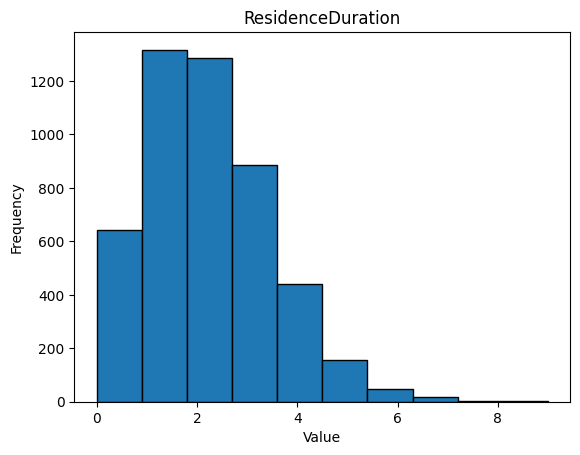

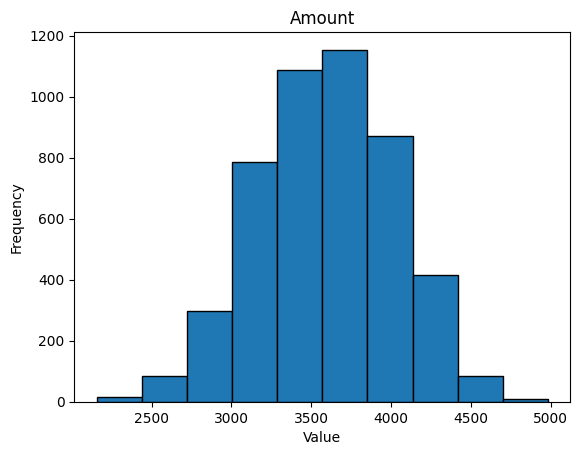

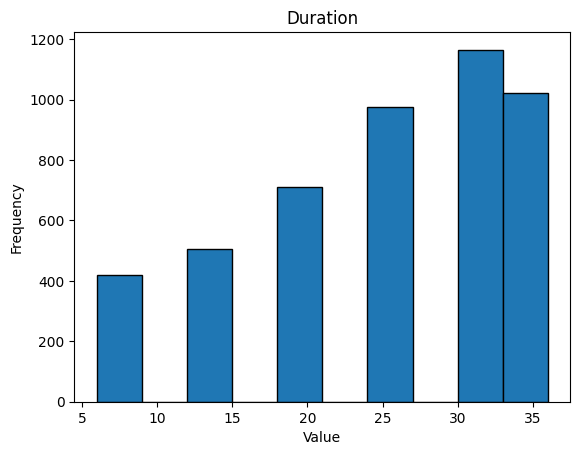

In [ ]:
#Review distribution of data
import matplotlib.pyplot as plt
def plot_hist(data, title):
    plt.hist(data, bins=10, edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
plot_hist(X_train['ResidenceDuration'], "ResidenceDuration");
plot_hist(X_train['Amount'], "Amount");
plot_hist(X_train['Duration'], "Duration");

After review distribution of ResidenceDuration,Amount,Duration features, I found that distribution of ResidenceDuration and Duration is not symmetric and don't follow the typical bell-shaped curve that characterizes a normal distribution.

In [ ]:
# Adding feature engineering : PowerTransformer to transform the distribution of numerical features to more closely resemble a normal (Gaussian) distribution.
from sklearn.preprocessing import PowerTransformer
scaler2 = PowerTransformer(method='yeo-johnson')
X_to_scale2 = ['Duration', 'ResidenceDuration']
X_train[X_to_scale2] = scaler2.fit_transform(X_train[X_to_scale2])

In [ ]:
# Adding feature engineering : RobustScaler to scale numerical features in a way that is robust to the presence of outliers in the data.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_to_scale = ['Duration', 'ResidenceDuration']
X_train[X_to_scale] = scaler.fit_transform(X_train[X_to_scale])

IndexError: ignored

In [ ]:
# Adding feature engineering : Create a PCA instance to reduce number of features
pca = PCA(n_components=50)
X_train = pca.fit_transform(X_train)

In [ ]:
# Build Baseline model : Random Forests
from sklearn.ensemble import RandomForestClassifier
Model2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=0)

Model2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Perform cross-validation and Measure the performance
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, cohen_kappa_score, recall_score, f1_score, roc_auc_score

scoring = {
    'AUC': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score),
    'kappa': make_scorer(cohen_kappa_score),
    'recall': make_scorer(recall_score)
}
cv_scores = cross_validate(Model2, X_train, y_train, cv=10, scoring=scoring)

# Print the results
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_scores['test_' + metric].mean():.2f} (+/- {cv_scores['test_' + metric].std() * 2:.2f})")

Auc: 0.58 (+/- 0.04)
F1: 0.28 (+/- 0.11)
Kappa: 0.21 (+/- 0.11)
Recall: 0.18 (+/- 0.09)


## 3.3: Adding feature selection

In [ ]:
# Adding feature selection by Wrapper Method
# Reduce to 20 features
from sklearn.feature_selection import RFECV, RFE

clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=0)

sel = RFE(estimator=clf, n_features_to_select=20)
Model3 = sel.fit(X_train, y_train)

X_train_new = sel.transform(X_train)
X_train_new.shape

(4800, 20)

In [ ]:
# Perform cross-validation and Measure the performance
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, cohen_kappa_score, recall_score, f1_score, roc_auc_score

scoring = {
    'AUC': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score),
    'kappa': make_scorer(cohen_kappa_score),
    'recall': make_scorer(recall_score)
}
cv_scores = cross_validate(Model3, X_train_new, y_train, cv=10, scoring=scoring)

# Print the results
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_scores['test_' + metric].mean():.2f} (+/- {cv_scores['test_' + metric].std() * 2:.2f})")

Auc: 0.60 (+/- 0.02)
F1: 0.33 (+/- 0.06)
Kappa: 0.26 (+/- 0.07)
Recall: 0.23 (+/- 0.05)


## 3.4: Adding hyperparameter tuning

In [ ]:
#Adding hyperparameter tuning by GridSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define the hyperparams grid to search over
param_grid = {
    "n_estimators": [50, 100,200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [5, 10, 15],
    "max_features": [0.3, 0.4, 0.5],
    "class_weight": ["balanced", None]
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)

# Create GridSearchCV with the specified parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid)

In [ ]:
# Fit the GridSearchCV on the data
grid_search.fit(X_train_new, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [5, 10, 15],
                         'max_features': [0.3, 0.4, 0.5],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 100, 200]})

In [ ]:
# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'class_weight': None, 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 50}
Best F1 Score: 0.8425


In [ ]:
# Apply best parameters to base model
clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    max_features=0.5,
    min_samples_leaf=5,
    min_samples_split=15,
    class_weight=None,
    random_state=0)

Model4 = clf.fit(X_train, y_train)

In [ ]:
# Perform cross-validation and Measure the performance
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, cohen_kappa_score, recall_score, f1_score, roc_auc_score

scoring = {
    'AUC': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score),
    'kappa': make_scorer(cohen_kappa_score),
    'recall': make_scorer(recall_score)
}
cv_scores = cross_validate(Model4, X_train_new, y_train, cv=10, scoring=scoring)

# Print the results
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_scores['test_' + metric].mean():.2f} (+/- {cv_scores['test_' + metric].std() * 2:.2f})")

Auc: 0.61 (+/- 0.04)
F1: 0.35 (+/- 0.09)
Kappa: 0.27 (+/- 0.09)
Recall: 0.26 (+/- 0.08)


## 3.5: Performance estimation on testing data

In [ ]:
#Preprocessing
#Drop some features that are not informative for prediction
X_test = X_test.drop(['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate'], axis=1)
print(X_test.columns)

Index(['Sex', 'PreviousDefault', 'NumberPets', 'PreviousAccounts',
       'ResidenceDuration', 'Amount', 'Married', 'Duration', 'City', 'Purpose',
       'DateOfBirth'],
      dtype='object')


In [ ]:
#Data Preprocessing
#Convert categorical features into a numerical features by OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['Sex','City','Purpose','DateOfBirth'])
encoder.fit(X_test,y_test)
X_test=encoder.transform(X_test)

In [ ]:
# Adding feature engineering : PowerTransformer to transform the distribution of numerical features to more closely resemble a normal (Gaussian) distribution.
from sklearn.preprocessing import PowerTransformer
scaler2 = PowerTransformer(method='yeo-johnson')
X_to_scale2 = ['Duration', 'ResidenceDuration']
X_test[X_to_scale2] = scaler2.fit_transform(X_test[X_to_scale2])

In [ ]:
# Adding feature engineering : RobustScaler to scale numerical features in a way that is robust to the presence of outliers in the data.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_to_scale = ['Duration', 'ResidenceDuration']
X_test[X_to_scale] = scaler.fit_transform(X_test[X_to_scale])

In [ ]:
# Adding feature engineering : Create a PCA instance to reduce number of features
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_test = pca.fit_transform(X_test)

In [ ]:
# Adding feature selection by Wrapper Method
from sklearn.feature_selection import RFECV, RFE
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=0)
sel = RFE(estimator=clf, n_features_to_select=20)
Model3 = sel.fit(X_test, y_test)
X_test_new = sel.transform(X_test)
X_test_new.shape

(1200, 20)

In [ ]:
TestModel = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    max_features=0.5,
    min_samples_leaf=5,
    min_samples_split=15,
    class_weight=None,
    random_state=0)

TestModel.fit(X_train_new, y_train)
y_pred= TestModel.predict(X_test_new)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[964  27]
 [185  24]]


In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss

print("AUC = {:.2f}".format(roc_auc_score(y_test, y_pred)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred)))
print("recall = {:.2f}".format(recall_score(y_test, y_pred)))

AUC = 0.54
F1 Score = 0.18
Kappa = 0.12
recall = 0.11


In [ ]:
from sklearn.metrics import classification_report
class_names = [str(x) for x in TestModel.classes_]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       991
           1       0.47      0.11      0.18       209

    accuracy                           0.82      1200
   macro avg       0.65      0.54      0.54      1200
weighted avg       0.77      0.82      0.78      1200



# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000.

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations.

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



Answer :

Current maintenance cost = $ 5,120,000 [ no. of actual fail x cost = 256 x2,000]


Random forest Model :

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

Cost per turbine

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 2,500 | 20,000 |
| **Actual No Fail**   | 500 | 0 |

Total cost

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 502,500 | 1,100,000 |
| **Actual No Fail**   | 25,000 | 0 |

Total maintenance cost from Random forest model = $1,627,500

RNN Model :

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |

Cost per turbine

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 2,500 | 20,000 |
| **Actual No Fail**   | 500 | 0 |

Total cost

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 565,500 | 600,000 |
| **Actual No Fail**   | 600,000 | 0 |

Total maintenance cost from Random forest model = $1,765,000

Therefore, Random forest model will save Uncle Steve more money


